# **This is a comprehensive analysis report of Kano state located in Nigeria with data retrieved from 37 local governments.**

In [8]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as pc
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/sample_data/KanoState_new.csv')
df.head()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
0,2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
1,2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2,2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
3,2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
4,2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27


In [10]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148666 entries, 0 to 148665
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   date                                  148666 non-null  object 
 1   Temperature_at_2-Meters (C)           148666 non-null  float64
 2   Temperature_at_2_Meters_Maximum (C)   148666 non-null  float64
 3   Temperature-at_2_Meters_Minimum (C)   148666 non-null  float64
 4   Relative_Humidity_at_2_Meters (%)     148666 non-null  float64
 5   Precipitation (mm/day)                148666 non-null  float64
 6   Wind_Speed_at_2_Meters (m/s)          148666 non-null  float64
 7   Wind_Speed_at_2_Meters_Maximum (m/s)  148666 non-null  float64
 8   Wind_Speed_at_2_Meters_Minimum (m/s)  148666 non-null  float64
 9   Wind_Direction_at_2_Meters (Degrees)  148666 non-null  float64
 10  Surface_Soil_Wetness                  148666 non-null  float64
 11  

In [13]:
df.shape

(148666, 17)

In [14]:
df.select_dtypes(include=['object']).columns

Index(['date', 'SUB_REGION', 'LGA'], dtype='object')

In [15]:
df.select_dtypes(include=['float64']).columns

Index(['Temperature_at_2-Meters (C)', 'Temperature_at_2_Meters_Maximum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture', 'LAT', 'LON'],
      dtype='object')

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
date,0
Temperature_at_2-Meters (C),0
Temperature_at_2_Meters_Maximum (C),0
Temperature-at_2_Meters_Minimum (C),0
Relative_Humidity_at_2_Meters (%),0
Precipitation (mm/day),0
Wind_Speed_at_2_Meters (m/s),0
Wind_Speed_at_2_Meters_Maximum (m/s),0
Wind_Speed_at_2_Meters_Minimum (m/s),0
Wind_Direction_at_2_Meters (Degrees),0


In [17]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

0


In [18]:
# Value counts for each categorical feature:

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for date:
date
2014-01-01    37
2021-05-07    37
2021-04-24    37
2021-04-25    37
2021-04-26    37
              ..
2017-09-06    37
2017-09-07    37
2017-09-08    37
2017-09-09    37
2024-12-31    37
Name: count, Length: 4018, dtype: int64
4018

Value counts for SUB_REGION:
SUB_REGION
S_Kano    76342
N_Kano    68306
Metro      4018
Name: count, dtype: int64
3

Value counts for LGA:
LGA
Kunchi          4018
Sumaila         4018
Tofa            4018
Takai           4018
Albasu          4018
Gaya            4018
Ajingi          4018
Wudil           4018
Warawa          4018
Dawakin_Kudu    4018
Rimin_Gado      4018
Bagwai          4018
Gezawa          4018
Gabasawa        4018
Minjibir        4018
Dambatta        4018
Makoda          4018
Garko           4018
Kiru            4018
Bichi           4018
Bebeji          4018
Tsanyawa        4018
Shanono         4018
Gwarzo          4018
Karaye          4018
Rogo            4018
Kabo            4018
Bunkure         4018
Kibiye  

In [19]:
def get_unique_lgas(df):
    """
    Get unique LGA values from the DataFrame and print them in a formatted list.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the LGA column
    """
    # Get unique LGA values and sort them
    unique_lgas = sorted(df['LGA'].dropna().unique(), key=lambda x: str(x))

    print(f"Total number of unique LGAs: {len(unique_lgas)}")
    print("\nList of unique LGAs:")

    # Print each LGA with a number
    for idx, lga in enumerate(unique_lgas, 1):
        print(f"{idx}. {lga}")
get_unique_lgas(df)

Total number of unique LGAs: 37

List of unique LGAs:
1. Ajingi
2. Albasu
3. Bagwai
4. Bebeji
5. Bichi
6. Bunkure
7. Dambatta
8. Dawakin_Kudu
9. Dawakin_Tofa
10. Doguwa
11. Gabasawa
12. Garko
13. Garun_Mallam
14. Gaya
15. Gezawa
16. Gwarzo
17. Kabo
18. Karaye
19. Kibiye
20. Kiru
21. Kunchi
22. Kura
23. Madobi
24. Makoda
25. Metro
26. Minjibir
27. Rano
28. Rimin_Gado
29. Rogo
30. Shanono
31. Sumaila
32. Takai
33. Tofa
34. Tsanyawa
35. Tudun_Wada
36. Warawa
37. Wudil


# Summary Statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature_at_2-Meters (C),148666.0,25.992740,4.057896,12.75,23.67,26.15,28.95,35.93
Temperature_at_2_Meters_Maximum (C),148666.0,33.697160,4.207250,17.40,30.52,33.58,36.83,44.20
Temperature-at_2_Meters_Minimum (C),148666.0,19.550714,4.665065,5.36,15.92,21.20,22.88,29.46
Relative_Humidity_at_2_Meters (%),148666.0,47.447771,23.155084,4.97,26.24,46.89,67.76,95.12
Precipitation (mm/day),148666.0,2.500358,11.209751,0.00,0.00,0.00,1.08,857.19
Wind_Speed_at_2_Meters (m/s),148666.0,1.522798,0.774304,0.10,0.96,1.41,1.99,5.42
Wind_Speed_at_2_Meters_Maximum (m/s),148666.0,2.653557,1.312185,0.21,1.68,2.52,3.49,8.44
Wind_Speed_at_2_Meters_Minimum (m/s),148666.0,0.712745,0.494539,0.00,0.35,0.62,0.98,3.87
Wind_Direction_at_2_Meters (Degrees),148666.0,139.982081,89.684296,0.10,61.10,98.10,229.10,359.90
Surface_Soil_Wetness,148666.0,0.333260,0.175456,0.07,0.19,0.29,0.44,0.99


# Outlier Detection - Skewness

In [21]:
# Detecting outliers using IQR (Interquartile Range)
numeric_data = df.select_dtypes(include=['number'])

# Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print(outliers)

Temperature_at_2-Meters (C)              1204
Temperature_at_2_Meters_Maximum (C)       138
Temperature-at_2_Meters_Minimum (C)         7
Relative_Humidity_at_2_Meters (%)           0
Precipitation (mm/day)                  24526
Wind_Speed_at_2_Meters (m/s)             2218
Wind_Speed_at_2_Meters_Maximum (m/s)     1371
Wind_Speed_at_2_Meters_Minimum (m/s)     3951
Wind_Direction_at_2_Meters (Degrees)        0
Surface_Soil_Wetness                     2639
Root_Zone_Soil_Wetness                   6831
Profile_Soil_Moisture                    8673
LAT                                      4018
LON                                         0
dtype: int64


**Key Observations:**
* Precipitation has the highest number of outliers (24,526), suggesting extreme variations. In addition outliers here could mean that localized flood or heavy fall might not be a representation of broader trends.

* Soil moisture variables show significant outliers, especially Profile Soil Moisture (8,673). Surface Soil Wetness, Root Zone Soil Wetness, Profile Soil Moisture otliers indicate heavy rainfalls or drought periods, soil retention power, or localized irrigation practices which could lead to error in reading values.

* Wind speed variables have moderate to high outliers, particularly minimum wind speed (3,951).

* Temperature outliers are more prominent in the maximum range, while minimum temperature has the fewest. This indicates kano state has more heatwaves than cold spells.

* Geographical latitude has many outliers (4,018), but longitude has none.

In [22]:
# Calculate skewness for all numerical columns
skewness = df.select_dtypes(include=['number']).skew()

# Display the skewness values
print(skewness)

Temperature_at_2-Meters (C)             -0.367660
Temperature_at_2_Meters_Maximum (C)     -0.027040
Temperature-at_2_Meters_Minimum (C)     -0.673883
Relative_Humidity_at_2_Meters (%)        0.117825
Precipitation (mm/day)                  18.258859
Wind_Speed_at_2_Meters (m/s)             0.699742
Wind_Speed_at_2_Meters_Maximum (m/s)     0.539893
Wind_Speed_at_2_Meters_Minimum (m/s)     1.180243
Wind_Direction_at_2_Meters (Degrees)     0.472253
Surface_Soil_Wetness                     0.971582
Root_Zone_Soil_Wetness                   1.806340
Profile_Soil_Moisture                    1.646366
LAT                                     -0.426031
LON                                      0.090995
dtype: float64


**Key Observations**
* Temperature variables are mostly symmetrical where data is evenly distributed to the mean. This inidcates relatively predictable patterns in temperature, although there may be extreme lows experienced .

* Precipitation is highly right-skewed, indicating that most times, kano State experiences relatively low rainfall events. I some cases, extreme rainfall might occur leaing to flood and damaged crops. It is advised that farmers should prepare for both dry spells and veavy downpours.

* Soil wetness and moisture variables show strong right skewness, suggesting more frequent lower values with occasional high spikes. This indicated that Kano State often experiences dry conditions with occasional heavy down pours. farmers need to carefully monitor soil moisture content and adjust irrigation strategies to avoid water stress in their crops. Choosing drought-tolerant crop varieties can also be a valuable adaptation strategy.

* Wind speed metrics show moderate to strong right skewness, meaning most values are low with occasional high-speed outliers. The maximum wind speed indicates occasional damages to crops due to high wind. Farmers need to consider affordable windbreak mesaures to prevent losses in crops.

* The skewness values suggest that Kano State generally experiences a dry climate with occasional high rainfall events. This poses challenges for farmers in terms of water management and crop selection. However, the relatively predictable temperatures can be beneficial for planning planting and harvesting activities.

* In essence, understanding the skewness of weather and soil data helps farmers to:

Make informed decisions about crop selection: Choosing varieties suited to the dominant conditions (e.g., drought-tolerant crops in dry areas).

Develop effective water management strategies: Implementing irrigation techniques that account for the skewed rainfall patterns and soil moisture conditions.

Implement risk mitigation measures: Preparing for extreme events like heavy rainfall or strong winds.

By understanding the likely distribution of weather conditions, farmers can better adapt their farming practices to the specific climate of Kano State and improve their chances of success.

# Univariate Analysis - Histogram

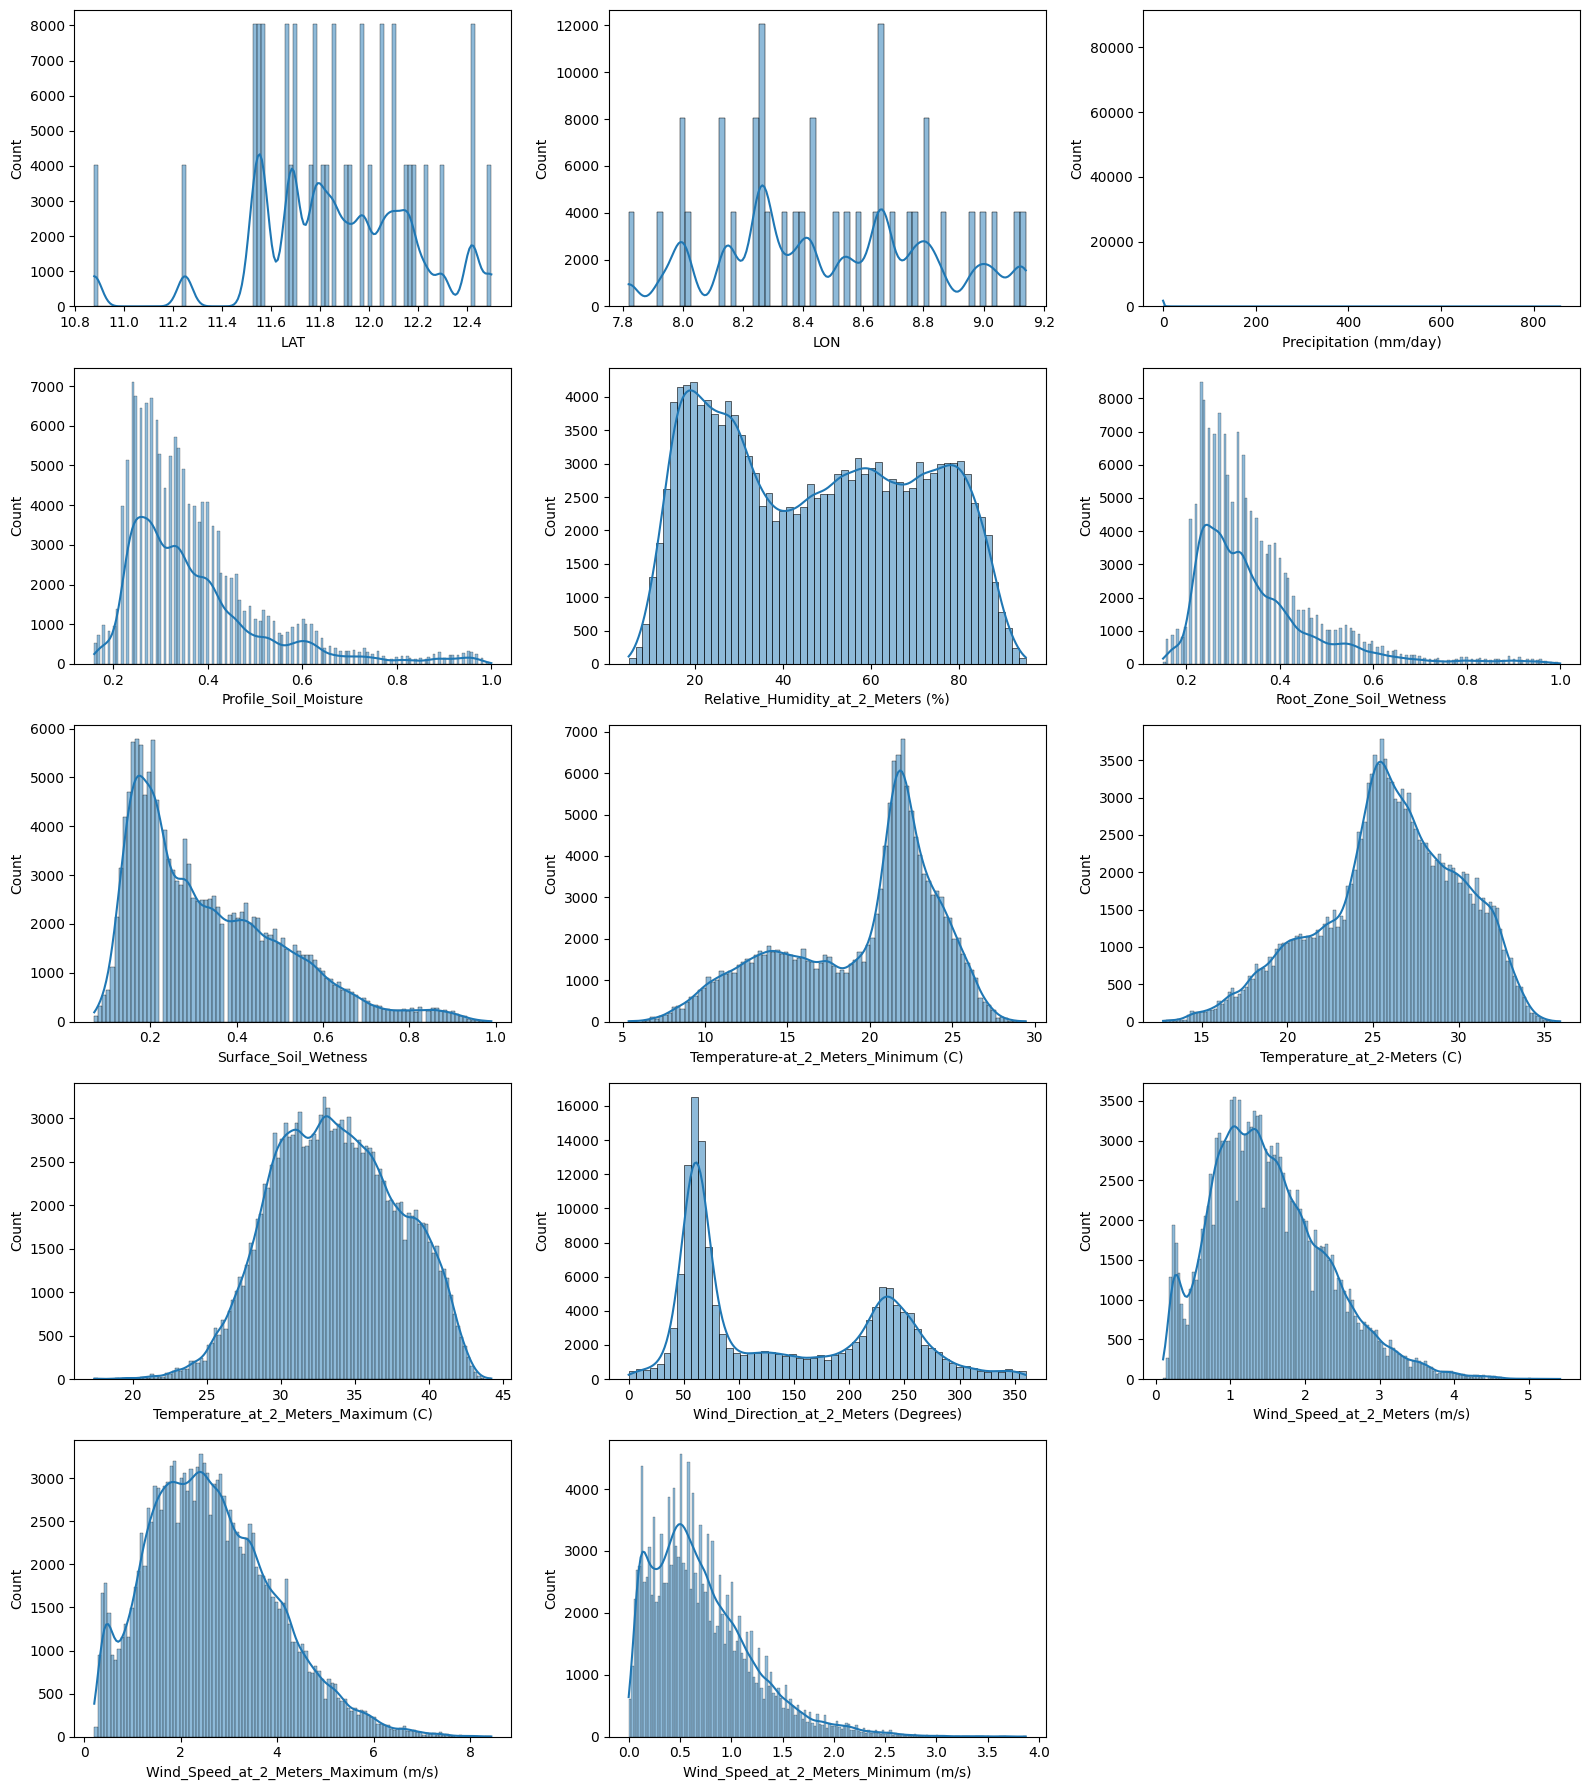

In [23]:
# Histogram plot:

num_rows = 5
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Exclude 'county_name' from the columns to plot
columns_to_plot = df.columns.difference(['date','LGA', 'SUB_REGION'])

for i, col in enumerate(columns_to_plot):
    # Create a histogram plot with KDE
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col)

# Hide any unused subplots
for i in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

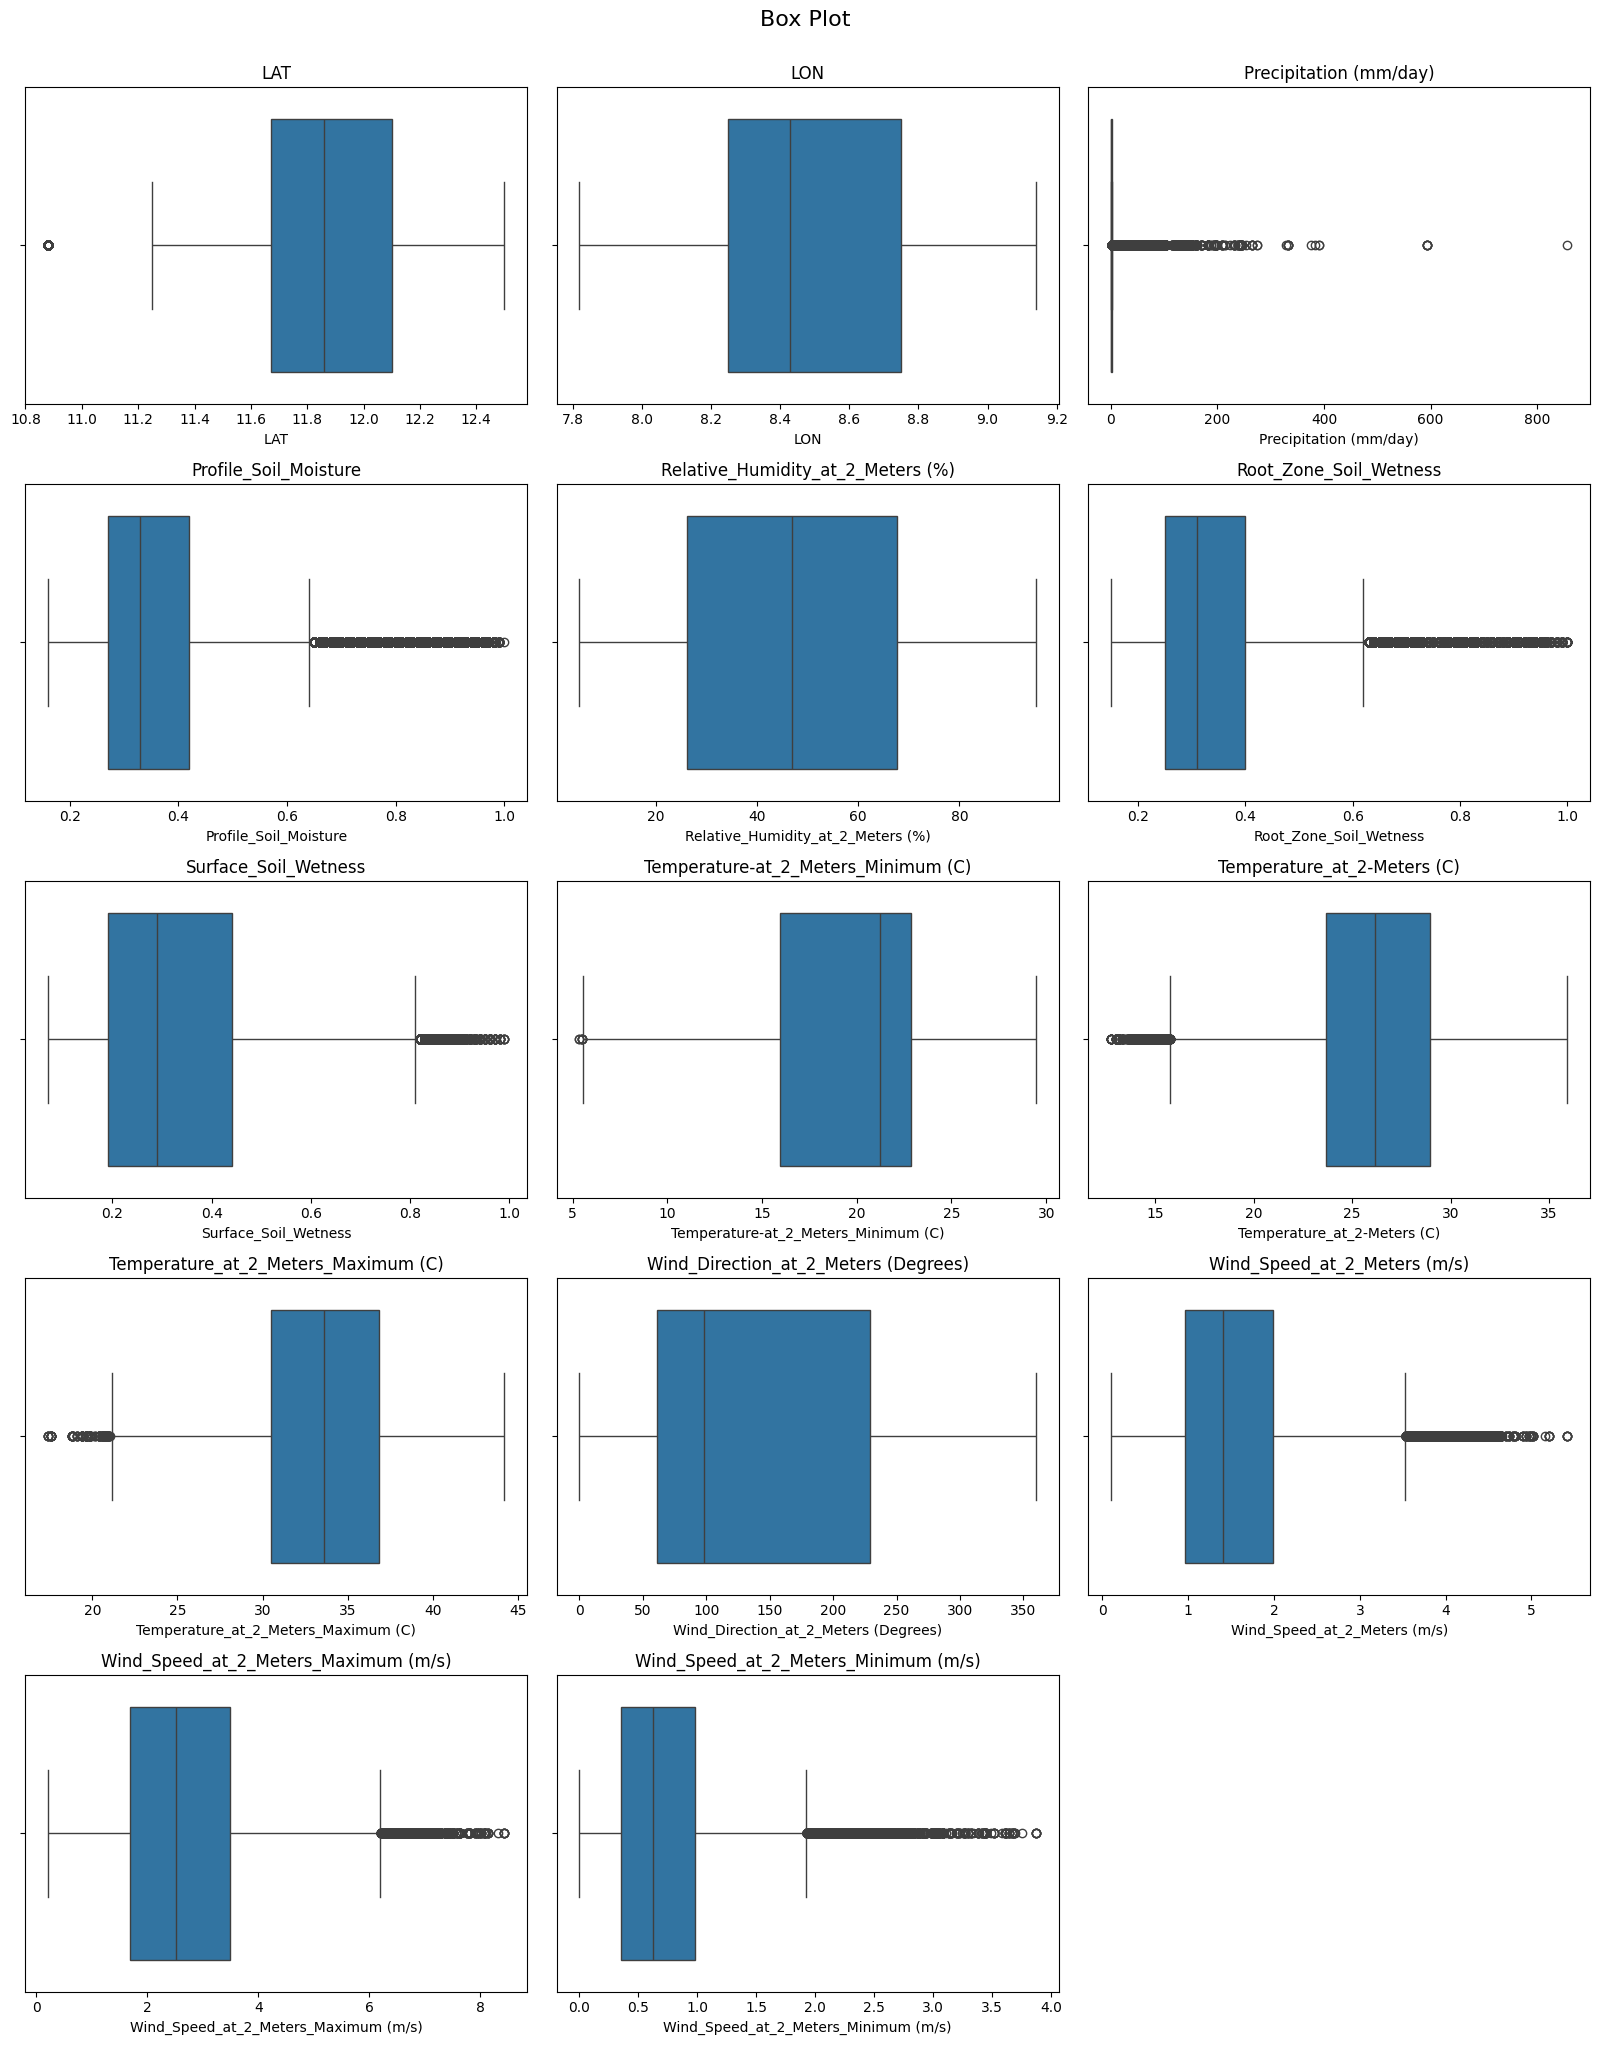

In [24]:
# Box plot:

num_rows = 5
num_columns = 3

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Exclude 'date','LGA', 'SUB_REGION' from the columns to plot
columns_to_plot = df.columns.difference(['date','LGA', 'SUB_REGION'])

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column}')

# Hide any unused subplots
for i in range(len(columns_to_plot), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Box Plot", y=1.02, fontsize=16)
plt.show()


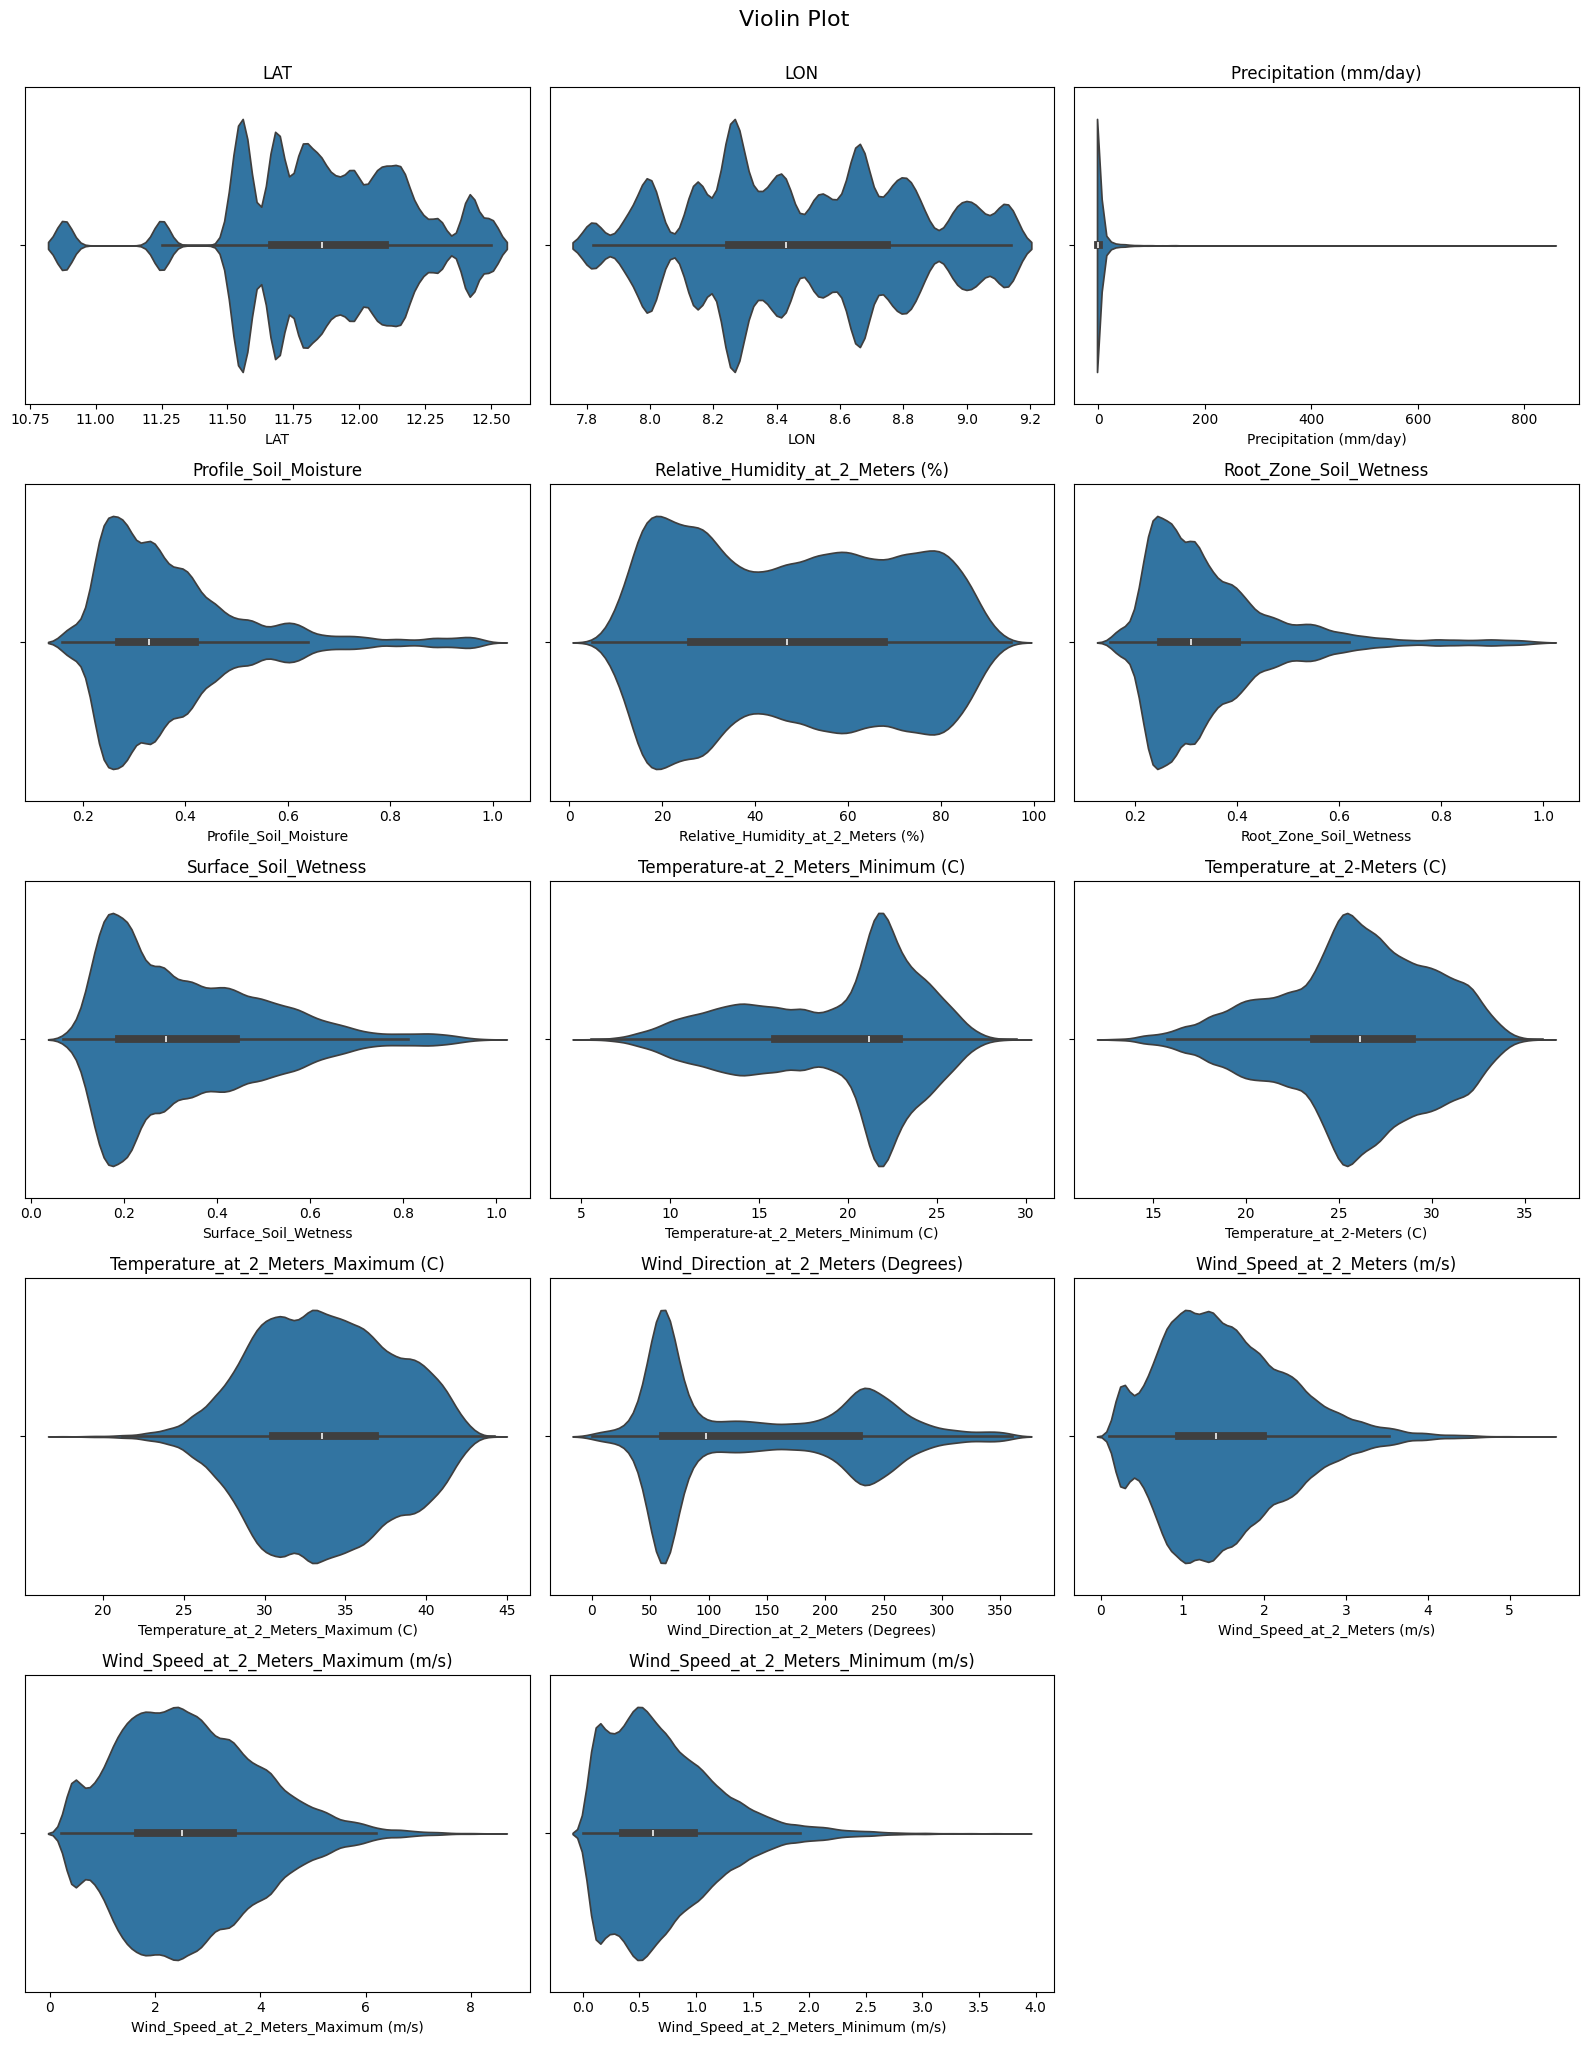

In [25]:
# Violin plot:

num_rows = 5
num_columns = 3

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Exclude 'date','LGA', 'SUB_REGION' from the columns to plot
columns_to_plot = df.columns.difference(['date','LGA', 'SUB_REGION'])

for i, column in enumerate(columns_to_plot):
    sns.violinplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column}')

# Hide any unused subplots
for i in range(len(columns_to_plot), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Violin Plot", y=1.02, fontsize=16)
plt.show()

# Correlation Analysis

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
df_corr= df_corr.applymap("{:.2f}".format)
#df_corr

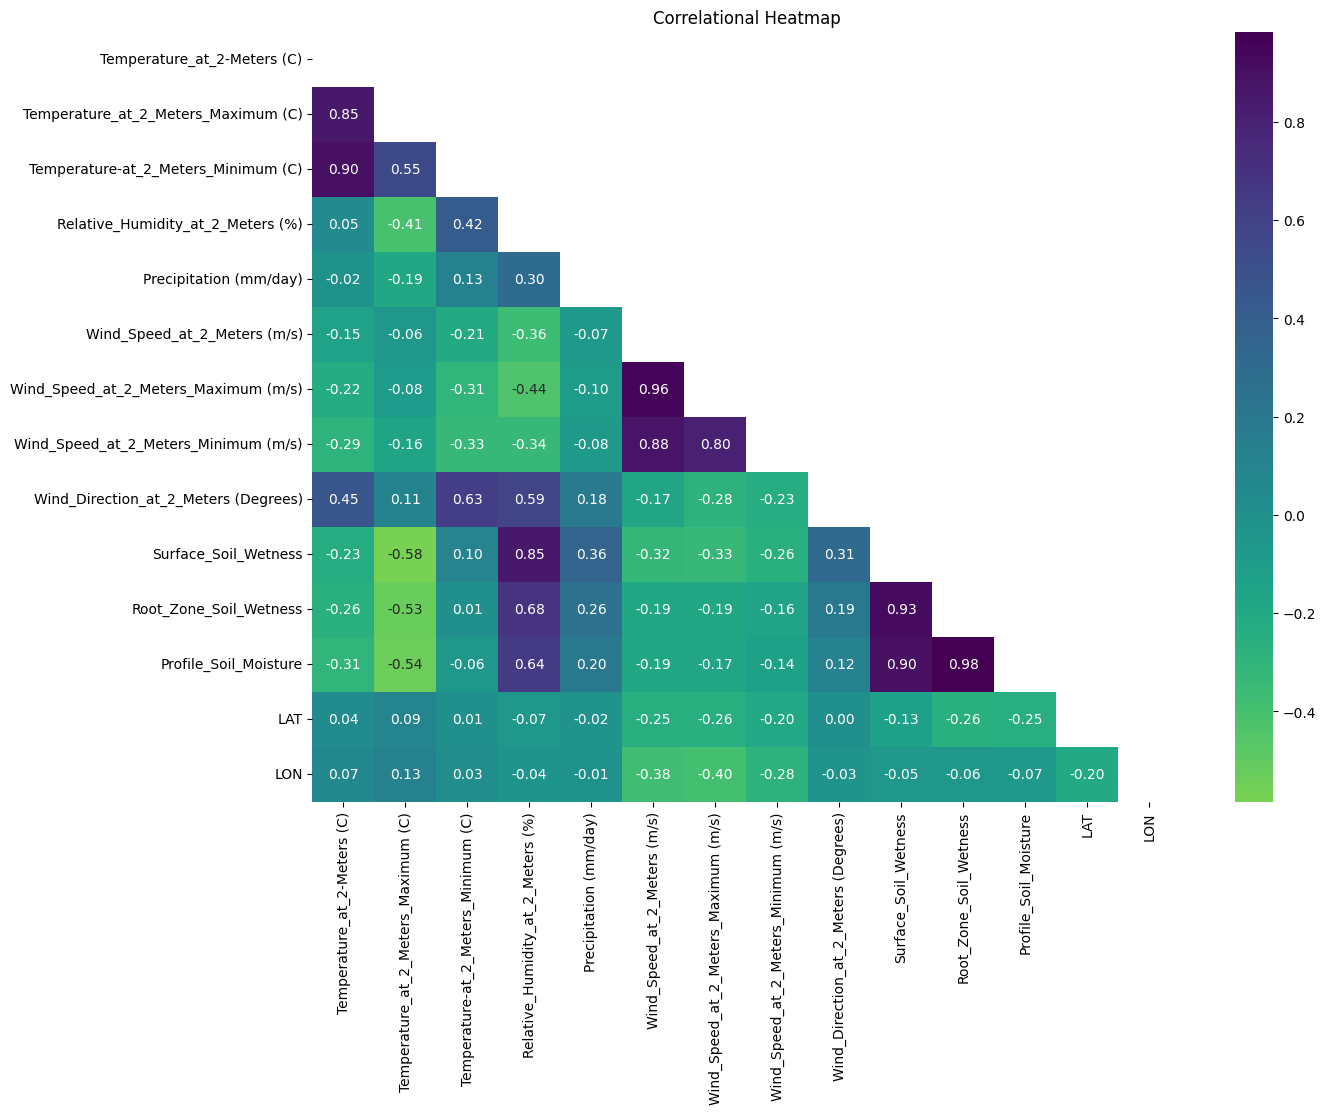

In [27]:
# Check for correlation
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90)
plt.title('Correlational Heatmap')
plt.show()

In [28]:
# Strongest Positive Correlated Features

numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')

# Threshold for high correlation
threshold = 0.80

# Extract the pairs of features with correlation values greater than the threshold
corr_pairs = df_corr.unstack()
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_corr = high_corr.reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr.drop_duplicates(subset=['Correlation'])

# Sort by correlation value in descending order
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

# Display the pairs
high_corr

,Feature1,Feature2,Correlation
13,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,0.983588
5,Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),0.956409
10,Surface_Soil_Wetness,Root_Zone_Soil_Wetness,0.927948
1,Temperature_at_2-Meters (C),Temperature-at_2_Meters_Minimum (C),0.900501
11,Surface_Soil_Wetness,Profile_Soil_Moisture,0.899382
6,Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),0.877565
4,Relative_Humidity_at_2_Meters (%),Surface_Soil_Wetness,0.852059
0,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),0.849676


In [29]:
# Strongest Negative Correlated Features

# Set the threshold for the negative correlation value
threshold = -0.5

# Extract the pairs of features with correlation values between -1 and the threshold
neg_corr_pairs = df_corr.unstack()
high_neg_corr = neg_corr_pairs[(neg_corr_pairs < threshold) & (neg_corr_pairs > -1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_neg_corr = high_neg_corr.reset_index()
high_neg_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_neg_corr = high_neg_corr.drop_duplicates(subset=['Correlation'])

# Filter out self-correlations
high_neg_corr = high_neg_corr[high_neg_corr['Feature1'] != high_neg_corr['Feature2']]

# Sort by correlation value in ascending order
high_neg_corr = high_neg_corr.sort_values(by='Correlation')

# Display the pairs
high_neg_corr

,Feature1,Feature2,Correlation
0,Temperature_at_2_Meters_Maximum (C),Surface_Soil_Wetness,-0.583249
2,Temperature_at_2_Meters_Maximum (C),Profile_Soil_Moisture,-0.540101
1,Temperature_at_2_Meters_Maximum (C),Root_Zone_Soil_Wetness,-0.534027


In [30]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

# Insight into Seasonal Trends:

# **Temperature**

In [31]:
# "Temperature_at_2-Meters (C)" vs year and month:

default_colors = pc.qualitative.Plotly  # Default Plotly color sequence

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Temperature (C) by Year',
    'Average Temperature (C) by Month'])

# First plot: Temperature vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_temperature_per_year = group_data.groupby('year')['Temperature_at_2-Meters (C)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_temperature_per_year.index,
        y=avg_temperature_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Temperature vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_temperature_per_month = group_data.groupby('month')['Temperature_at_2-Meters (C)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_temperature_per_month.index,
        y=avg_temperature_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Temperature Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average temperature remained relatively stable between 2014 and 2018, followed by a gradual decline from 2019 to 2021. There is a significant drop in 2021-2022, but a sharp recovery post-2022.
* Monthly Trend (Right Plot): The temperature follows a clear seasonal pattern, peaking around May and decreasing towards December-January. This confirms the cyclic behavior seen in the first plot.

In [32]:
# Seasonal and Long-Term Trends in Temperature

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Temperature_at_2-Meters (C)', color='SUB_REGION',
              title='Temperature Trends Over Time (By Sub-Region)',
              labels={'Temperature_at_2-Meters (C)': 'Temperature (C)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()


* The temperature exhibits strong seasonal variations with a repeating annual cycle.
* There are periodic peaks (warmer months) and troughs (cooler months) consistently across the years.
* While seasonal fluctuations remain prominent, there seems to be an overall slight decline in temperature after 2018, followed by a noticeable dip around 2021-2022 and a recovery afterward.
* The three sub-regions (Metro, N_Kano, and S_Kano) exhibit similar temperature trends, with slight variations in absolute values.

# **Precipitation**

In [33]:
# "Precipitation (mm/day)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Precipitation (mm/day) by Year',
    'Average Precipitation (mm/day) by Month'])

# First plot: Precipitation vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Precipitation_per_year = group_data.groupby('year')['Precipitation (mm/day)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Precipitation_per_year.index,
        y=avg_Precipitation_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Precipitation vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Precipitation_per_month = group_data.groupby('month')['Precipitation (mm/day)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Precipitation_per_month.index,
        y=avg_Precipitation_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Precipitation Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average daily precipitation remained relatively stable between 2014 and 2019, followed by a gradual increase peaking around 2020. There is a significant peak in 2020-2021, especially in S_Kano, with other locations also showing peaks but at lower values.

* Monthly Trend (Right Plot): The average daily precipitation follows a clear seasonal pattern, peaking between June and August. S_Kano shows the highest levels during these months, exceeding 8 mm/day, while N_Kano and Metro follow closely. This confirms the cyclic behavior seen in the first plot.

In [34]:
# Seasonal and Long-Term Trends in Precipitation (mm/day)

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Precipitation (mm/day)', color='SUB_REGION',
              title='Precipitation Trends Over Time (By Sub-Region)',
              labels={'Precipitation (mm/day)': 'Precipitation', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

* The precipitation exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks (higher precipitation) and troughs (lower precipitation) consistently across the years.

* While seasonal fluctuations remain prominent, there seems to be an overall increase in precipitation after 2018, followed by a significant peak around 2020-2021, especially in S_Kano, and a slight decline afterward.

# **Relative Humidity:**

In [35]:
# "Relative_Humidity_at_2_Meters (%)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Relative Humidity (%) by Year',
    'Average Relative Humidity (%) by Month'])

# First plot: Relative Humidity vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Relative_Humidity_per_year = group_data.groupby('year')['Relative_Humidity_at_2_Meters (%)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Relative_Humidity_per_year.index,
        y=avg_Relative_Humidity_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Relative Humidity vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Relative_Humidity_per_month = group_data.groupby('month')['Relative_Humidity_at_2_Meters (%)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Relative_Humidity_per_month.index,
        y=avg_Relative_Humidity_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Relative Humidity (%) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average daily humidity remained relatively stable between 2014 and 2019, followed by a significant increase peaking around 2020-2021, especially in S_Kano. After this peak, there is a slight decline in humidity levels.

* Monthly Trend (Right Plot): The average daily humidity follows a clear seasonal pattern, peaking between June and August. S_Kano shows the highest levels during these months, reaching approximately 80%, while N_Kano and Metro follow closely, with values slightly below 80%.

In [36]:
# Seasonal and Long-Term Trends in Relative Humidity (%)

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Relative_Humidity_at_2_Meters (%)', color='SUB_REGION',
              title='Relative Humidity Trends Over Time (By Sub-Region)',
              labels={'Relative_Humidity_at_2_Meters (%)': 'Relative Humidity(%)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

* The relative humidity exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks (higher humidity) and troughs (lower humidity) consistently across the years.

* While seasonal fluctuations remain prominent, there seems to be an overall increase in humidity after 2018, followed by a significant peak around 2020-2021, especially in S_Kano, and a slight decline afterward.

# **Profile Soil Moisture**

In [37]:
# "Profile_Soil_Moisture" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Profile Soil Moisture by Year',
    'Average Profile Soil Moisture by Month'])

# First plot: RProfile Soil Moisture vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Profile_Soil_Moisture_per_year = group_data.groupby('year')['Profile_Soil_Moisture'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Profile_Soil_Moisture_per_year.index,
        y=avg_Profile_Soil_Moisture_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Profile Soil Moisture vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Profile_Soil_Moisture_per_month = group_data.groupby('month')['Profile_Soil_Moisture'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Profile_Soil_Moisture_per_month.index,
        y=avg_Profile_Soil_Moisture_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Soil Moisture Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend: The average profile soil moisture remained relatively stable between 2014 and 2019, followed by a significant increase peaking around 2020-2021, especially in S_Kano. After this peak, there is a decline in soil moisture levels.

* Monthly Trend: The average profile soil moisture follows a clear seasonal pattern, peaking between August and October. S_Kano shows the highest levels during these months, reaching approximately 0.55, while N_Kano and Metro follow closely, with values slightly below 0.55.


In [38]:
# Seasonal and Long-Term Trends in Profile Soil Moisture

df['date'] = pd.to_datetime(df['date'])

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns  # Get numeric columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)  # Convert back for plotting

# Soil Moisture Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Profile_Soil_Moisture', color='SUB_REGION',
              title='Soil Moisture Trends Over Time (By Sub-Region)',
              labels={'Profile_Soil_Moisture': 'Soil Moisture', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()


* The soil moisture exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks and troughs consistently across the years.

* While seasonal fluctuations remain prominent, there seems to be an overall slight increase in soil moisture levels around 2020-2021, followed by a noticeable decline afterward.


# **Wind Speed**

In [39]:
# "Wind_Speed_at_2_Meters (m/s)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Wind Speed (m/s) by Year',
    'Average Wind Speed (m/s) by Month'])

# First plot: Wind Speed vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Wind_Speed_per_year = group_data.groupby('year')['Wind_Speed_at_2_Meters (m/s)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Wind_Speed_per_year.index,
        y=avg_Wind_Speed_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Wind Speed vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Wind_Speed_per_month = group_data.groupby('month')['Wind_Speed_at_2_Meters (m/s)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Wind_Speed_per_month.index,
        y=avg_Wind_Speed_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Wind Speed (m/s) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend: The wind speed exhibits minor variations with a generally stable trend across the years. There are slight fluctuations consistently across the years. While these fluctuations are observed, the overall trend shows stable wind speeds for Metro around 0.8 m/s, with N_Kano and S_Kano fluctuating between 1.4 and 1.6 m/s.

* Monthly Trend: The wind speed exhibits strong seasonal variations with a repeating annual cycle. There are periodic peaks in January and December, and troughs in the middle months, consistently across the years. S_Kano shows the highest wind speeds around 2 m/s in January, with the N_Kano and Metro lines following a similar pattern, peaking around 1.2 m/s and dipping to around 0.5-0.6 m/s in the middle months.


In [40]:
# Seasonal and Long-Term Trends in Wind Speed (m/s)

df['date'] = pd.to_datetime(df['date'])

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns  # Get numeric columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)  # Convert back for plotting

# Soil Moisture Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Wind_Speed_at_2_Meters (m/s)', color='SUB_REGION',
              title='Wind Speed (m/s) Trends Over Time (By Sub-Region)',
              labels={'Wind_Speed_at_2_Meters (m/s)': 'Wind Speed (m/s)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()


* The wind speed exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks and troughs consistently across the years.

* Comparing regions, S_Kano and N_Kano show the highest wind speeds during the peak months, reaching approximately 2 m/s, while Metro follows a similar pattern, peaking around 1.2 m/s.


# **Surface Soil Wetness:**

In [41]:
# "Surface_Soil_Wetness" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Surface Soil Wetness by Year',
    'Average Surface Soil Wetness by Month'])

# First plot: Surface Soil Wetness vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Surface_Soil_Wetness_per_year = group_data.groupby('year')['Surface_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Surface_Soil_Wetness_per_year.index,
        y=avg_Surface_Soil_Wetness_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Surface Soil Wetness vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Surface_Soil_Wetness_per_month = group_data.groupby('month')['Surface_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Surface_Soil_Wetness_per_month.index,
        y=avg_Surface_Soil_Wetness_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Surface Soil Wetness Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

In [42]:
# Seasonal and Long-Term Trends in Surface Soil Wetness

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Surface_Soil_Wetness', color='SUB_REGION',
              title='Surface Soil Wetness Trends Over Time (By Sub-Region)',
              labels={'Surface_Soil_Wetness': 'Surface Soil Wetness', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

# **Root Zone Soil Wetness:**

In [43]:
# "Root_Zone_Soil_Wetness" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Root Zone Soil Wetness by Year',
    'Average Root Zone Soil Wetness by Month'])

# First plot: Root Zone Soil Wetness vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Root_Zone_Soil_Wetness_per_year = group_data.groupby('year')['Root_Zone_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Root_Zone_Soil_Wetness_per_year.index,
        y=avg_Root_Zone_Soil_Wetness_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Root Zone Soil Wetness vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Root_Zone_Soil_Wetness_per_month = group_data.groupby('month')['Root_Zone_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Root_Zone_Soil_Wetness_per_month.index,
        y=avg_Root_Zone_Soil_Wetness_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Root Zone Soil Wetness Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

In [44]:
# Seasonal and Long-Term Trends in Root Zone Soil Wetness

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Root_Zone_Soil_Wetness', color='SUB_REGION',
              title='Root Zone Soil_Wetness Trends Over Time (By Sub-Region)',
              labels={'Root_Zone_Soil_Wetness': 'Root Zone Soil Wetness', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

In [45]:
# Install folium if not already installed
!pip install folium

import folium
from folium import plugins
from google.colab import output
# This enables displaying the map in Colab
output.enable_custom_widget_manager()

def create_coordinate_map(df):
    """
    Create an interactive map showing points based on latitude and longitude data
    """
    # Calculate the center point of all coordinates
    center_lat = df['LAT'].mean()
    center_lon = df['LON'].mean()

    # Create a base map centered on the mean coordinates
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=9,
        tiles='CartoDB positron'
    )

    # Create a marker cluster group
    marker_cluster = plugins.MarkerCluster().add_to(m)

    # Add points for each unique LGA location
    for lga in df['LGA'].unique():
        lga_data = df[df['LGA'] == lga]

        # Get the mean coordinates for each LGA
        lga_lat = lga_data['LAT'].mean()
        lga_lon = lga_data['LON'].mean()

        # Create a popup with LGA information
        popup_text = f"""
        <b>LGA:</b> {lga}<br>
        <b>Latitude:</b> {lga_lat:.4f}<br>
        <b>Longitude:</b> {lga_lon:.4f}
        """

        # Add marker
        folium.Marker(
            location=[lga_lat, lga_lon],
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=lga,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    return m

def create_heatmap(df):
    """
    Create a heatmap based on the density of data points
    """
    # Calculate the center point
    center_lat = df['LAT'].mean()
    center_lon = df['LON'].mean()

    # Create base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=9,
        tiles='CartoDB dark_matter'
    )

    # Prepare data for heatmap
    heat_data = [[row['LAT'], row['LON']] for index, row in df.iterrows()]

    # Add heatmap layer
    plugins.HeatMap(heat_data, radius=15).add_to(m)

    return m

# Create and display marker map
marker_map = create_coordinate_map(df)
display(marker_map)

# Create and display heatmap
heat_map = create_heatmap(df)
display(heat_map)

# If you want to save the maps
marker_map.save('kano_coordinate_map.html')
heat_map.save('kano_heatmap.html')